#  Partie 2- Laboratoire 1

### Importation des librairies importantes

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import math

### On définit quantités utilisées plus tard

err_lect_P: incertitude sur la lecture des puissances [$\mu W$]

err_lect_z: incertitude sur la lecture des décalages en z [$\mu m$]

In [2]:
res_lect_P = 0.01 
err_lect_P = res_lect_P/np.sqrt(2)
res_lect_z = 10
inc_lect_z = res_lect_z/np.sqrt(2)

## 1. Résultats des mesures de puissance avec et sans sténopé

### 1.1 Mesures avec sténopé

1.1.1 Calculs de la puissance moyenne et des incertitudes

Définissons les variables utilisées ci-dessous:

as: avec sténopé

decalage_as: position en z du troisième miroir [$\mu m$]

mesure_as_min: puissance minimale mesurée dans un temps de mesure de 10 secondes [$\mu W$]

mesure_as_max: puissance maximale mesurée dans un temps de mesure de 10 secondes [$\mu W$]

moy_P_as: puissance moyenne mesurée dans un temps de mesure de 10 secondes [$\mu W$]

inc_tot_as_P: incertitude totale sur la puissance pour les mesures avec sténopé [$\mu W$]

In [3]:
decalage_as = np.sort((1e3)*np.array([12.92, 12.86, 12.81, 12.77, 12.72, 12.66, 12.56, 12.46, 12.28, 11.60, 13.09, 13.21, 13.27, 13.30, 13.39, 13.44, 13.53, 13.70, 14.08, 15.23]))
P_as_min = np.array([20, 60, 90, 150, 195, 245, 290, 320, 370, 410, 430, 350, 300, 270, 210, 170, 140, 90, 40, 9])
P_as_max = np.array([30, 90, 120, 170, 215, 255, 300, 350, 400, 460, 480, 370, 330, 300, 240, 210, 160, 100, 50, 11])
moy_P_as = (np.array(P_as_min) + np.array(P_as_max)) / 2.0
inc_exp_as = np.abs(np.subtract(P_as_max, P_as_min)) / 2.0

# calcul des incertitudes sur la puissance
inc_tot_as_P = np.empty(len(inc_exp_as), dtype=object) 
for i in range(len(inc_exp_as)):
    inc_tot_as_P[i] = np.sqrt(inc_exp_as[i]**2+err_lect_P**2)


In [4]:
print(inc_tot_as_P)

[5.0000049999975005 15.000001666666574 15.000001666666574
 10.000002499999688 10.000002499999688 5.0000049999975005
 5.0000049999975005 15.000001666666574 15.000001666666574
 25.00000099999998 25.00000099999998 10.000002499999688 15.000001666666574
 15.000001666666574 15.000001666666574 20.00000124999996
 10.000002499999688 5.0000049999975005 5.0000049999975005
 1.000024999687508]


1.1.2 Graphique des résultats

Avec un fit gaussien sur les données. Le fit est décrit par: $P(z) = \frac{1}{\sigma \sqrt{2\pi}} \exp{\{-(z-\mu)^2/(2\sigma^2)}\} $, où $\sigma$ est l'écart-type et $\mu$ est la moyenne des décalages en $z$ mesurées. La largeur mi-hauteur est aussi calculée ci-dessous à l'aide de la formule: $FWHM = 2\sigma\sqrt{2\ln{2}}$. 

FWHM_as  774.2023481707465 

428.4169784833016 13031.102506687943 328.7734660677951


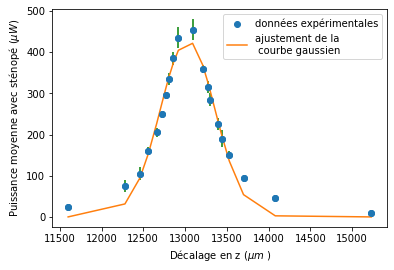

In [6]:
# calcul de l'écart-type et de la moyenne des décalages
avg_dec_as = sum(decalage_as)/len(decalage_as) 
std_dec_as = np.std(decalage_as)

# graphique
plt.scatter(decalage_as, moy_P_as, label='données expérimentales')
plt.xlabel("Décalage en z ($\mu m$ )")
plt.ylabel("Puissance moyenne avec sténopé ($\mu W$)")
plt.errorbar(decalage_as, moy_P_as, xerr = inc_lect_z, yerr = inc_tot_as_P, fmt='o', ecolor='g')

# Define model function to be used to fit to the data above:
def gauss(x, *p):
    a, b, c = p
    y = a*np.exp(-(x-b)**2/2/c**2)
    return y
# p0 is the initial guess for the fitting coefficients (a, b and c above)
p0 = [np.max(moy_P_as), avg_dec_as, std_dec_as]
coeff, var_matrix = curve_fit(gauss, decalage_as,moy_P_as, p0=p0)
a_fit, b_fit, c_fit = coeff

# Get the fitted curve
fit_as = gauss(decalage_as, *coeff)
plt.plot(decalage_as, fit_as, label='ajustement de la \n courbe gaussien')
plt.legend()
# calcul du FWHM pour le cas avec sténopé
FWHM_as = 2*np.sqrt(2*math.log(2))*c_fit
print("FWHM_as ", FWHM_as, "\n")
print(a_fit, b_fit, c_fit)

### 1.2 Mesures sans sténopé

1.2.1 Calcul des incertitudes

Définissons les variables utilisées ci-dessous:

ss: sans sténopé

decalage_ss: position en z du troisième miroir [$\mu m$]

mesure_ss_min: puissance minimale mesurée dans un temps de mesure de 10 secondes [$\mu W$]

mesure_ss_max: puissance maximale mesurée dans un temps de mesure de 10 secondes [$\mu W$]

moy_P_ss: puissance moyenne mesurée dans un temps de mesure de 10 secondes [$\mu W$]

inc_tot_ss_P: incertitude totale sur la puissance pour les mesures avec sténopé [$\mu W$]


In [7]:
decalage_ss = np.sort((1e3)*np.array([11.0, 10.50, 10.0, 9.50, 9.0, 8.50, 8.0, 7.5, 7.0, 6.5, 12.0, 12.5, 13.5, 14.0, 14.5, 15.0, 15.5, 16.0, 16.5]))
P_ss_min = np.array([639, 640, 642, 643, 646, 645, 647, 649, 652, 657, 663, 650, 650, 646, 650, 649, 644, 641, 638])
P_ss_max = np.array([641, 642, 644, 645, 646, 647, 649, 651, 656, 663, 665, 656, 652, 647, 652, 649, 644, 641, 638])
moy_P_ss = (np.array(P_ss_min) + np.array(P_ss_max)) / 2.0

inc_exp_ss = np.abs(np.subtract(P_ss_max, P_ss_min)) / 2.0

# calcul des incertitudes sur la puissance
inc_tot_ss_P = np.empty(len(inc_exp_ss), dtype=object) 
for i in range(len(inc_exp_ss)):
    inc_tot_ss_P[i] = np.sqrt(inc_exp_ss[i]**2+err_lect_P**2)

In [19]:
print(inc_tot_ss_P)

[1.000024999687508 1.000024999687508 1.000024999687508 1.000024999687508
 0.0070710678118654745 1.000024999687508 1.000024999687508
 1.000024999687508 2.000012499960938 3.0000083333217593 1.000024999687508
 3.0000083333217593 1.000024999687508 0.5000499975002499 1.000024999687508
 0.0070710678118654745 0.0070710678118654745 0.0070710678118654745
 0.0070710678118654745]


2.1.2 Graphique des résultats

Avec un fit gaussien sur les données. Le fit est décrit par: $P(z) = \frac{1}{\sigma \sqrt{2\pi}} \exp{\{-(x-\mu)^2/(2\sigma^2)}\} $, où $\sigma$ est l'écart-type et $\mu$ est la moyenne des puissances mesurées.

FWHM_ss 50826.04739737952 

654.8767681442488 11652.85255649168 21583.83503853328


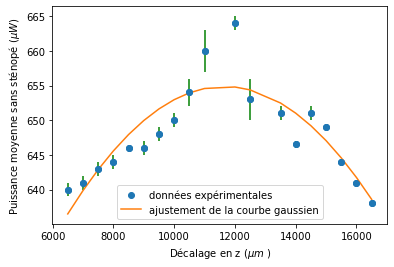

In [9]:
# calcul de l'écart-type et de la moyenne des décalages
avg_dec_ss = sum(decalage_ss)/len(decalage_ss) 
std_dec_ss = np.std(decalage_ss)

# calcul de l'écart-type et de la moyenne des décalages
avg_dec_ss = np.mean(decalage_ss) 
std_dec_ss = np.std(decalage_ss)

# graphique 
plt.scatter(decalage_ss, moy_P_ss, label='données expérimentales')
plt.xlabel("Décalage en z ($\mu m$ )")
plt.ylabel("Puissance moyenne sans sténopé ($\mu W$)")
plt.errorbar(decalage_ss, moy_P_ss, xerr = inc_lect_z, yerr = inc_tot_ss_P, fmt='o', ecolor='g')
# pas de barres d'erreur en x... mystère

# fit gaussien
def gauss(x, *p):
    a, b, c = p
    y = a*np.exp(-(x-b)**2/2/c**2)
    return y
# p0 is the initial gues
p0 = [np.max(decalage_ss), avg_dec_ss, std_dec_ss]
coeff, var_matrix = curve_fit(gauss, decalage_ss,moy_P_ss, p0=p0)
a_fit, b_fit, c_fit = coeff
# Get the fitted curve
fit_ss = gauss(decalage_ss, *coeff)
plt.plot(decalage_ss, fit_ss, label='ajustement de la courbe gaussien')
plt.legend()

# calcul du FWHM pour le cas sans sténopé
FWHM_ss = 2*np.sqrt(2*math.log(2))*c_fit
print("FWHM_ss", FWHM_ss, "\n")
print(a_fit, b_fit, c_fit)

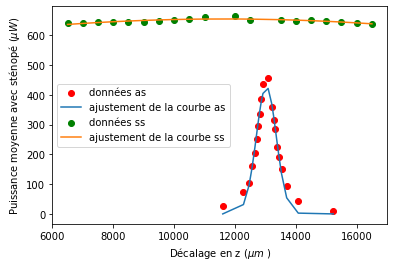

In [14]:
plt.scatter(decalage_as, moy_P_as, color='r', label='données as')
plt.plot(decalage_as, fit_as, label='ajustement de la courbe as')
plt.scatter(decalage_ss, moy_P_ss, color='g', label='données ss')
plt.plot(decalage_ss, fit_ss, label='ajustement de la courbe ss')
plt.xlabel("Décalage en z ($\mu m$ )")
plt.ylabel("Puissance moyenne avec sténopé ($\mu W$)")
plt.legend()